In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
# import netCDF4
# from netCDF4 import num2date
import os
import datetime
import numpy as np
basins = ["cascades","california","northernrockies","southernrockies","whites"]
scenarios = ["historical","rcp45","rcp85"]
variables=["swe","sm"]

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


saving figure to '/raid9/gergel/agg_snowpack/plots/agg_swe/swe.png'
saving figure to '/raid9/gergel/agg_snowpack/plots/agg_sm/sm.png'


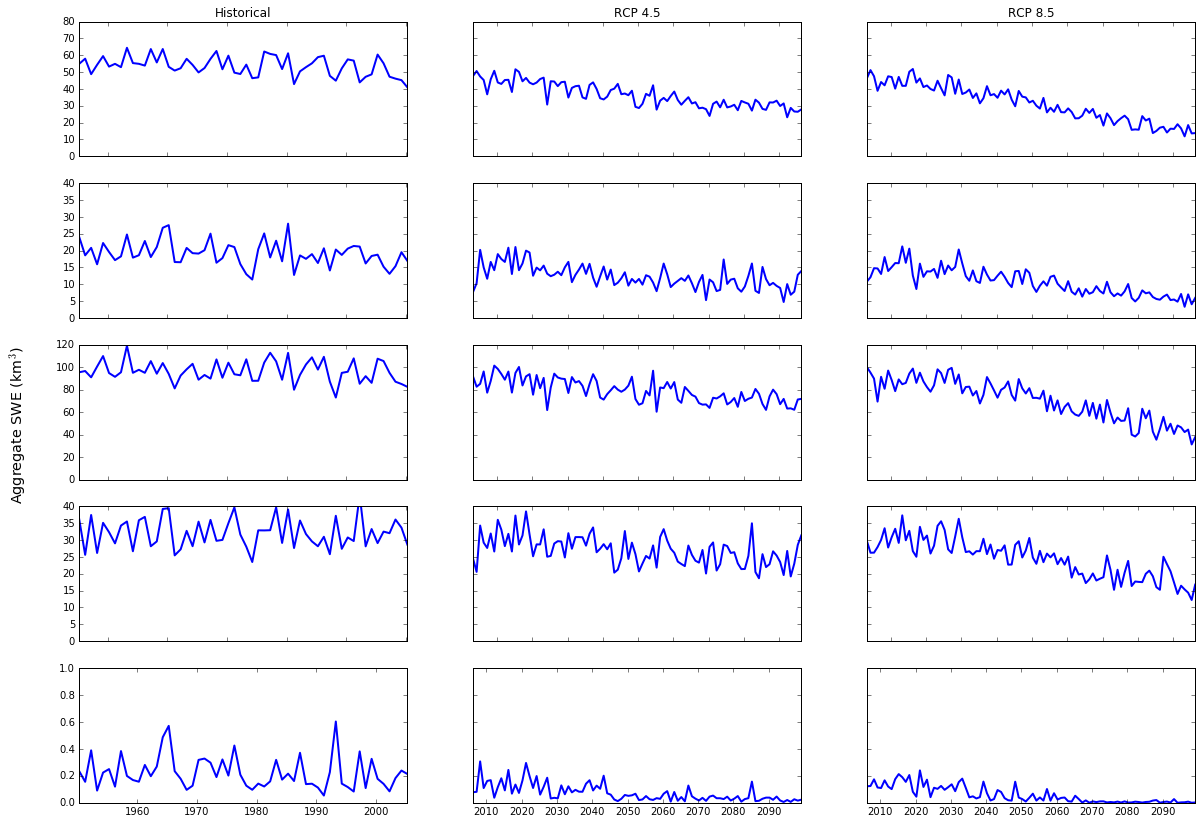

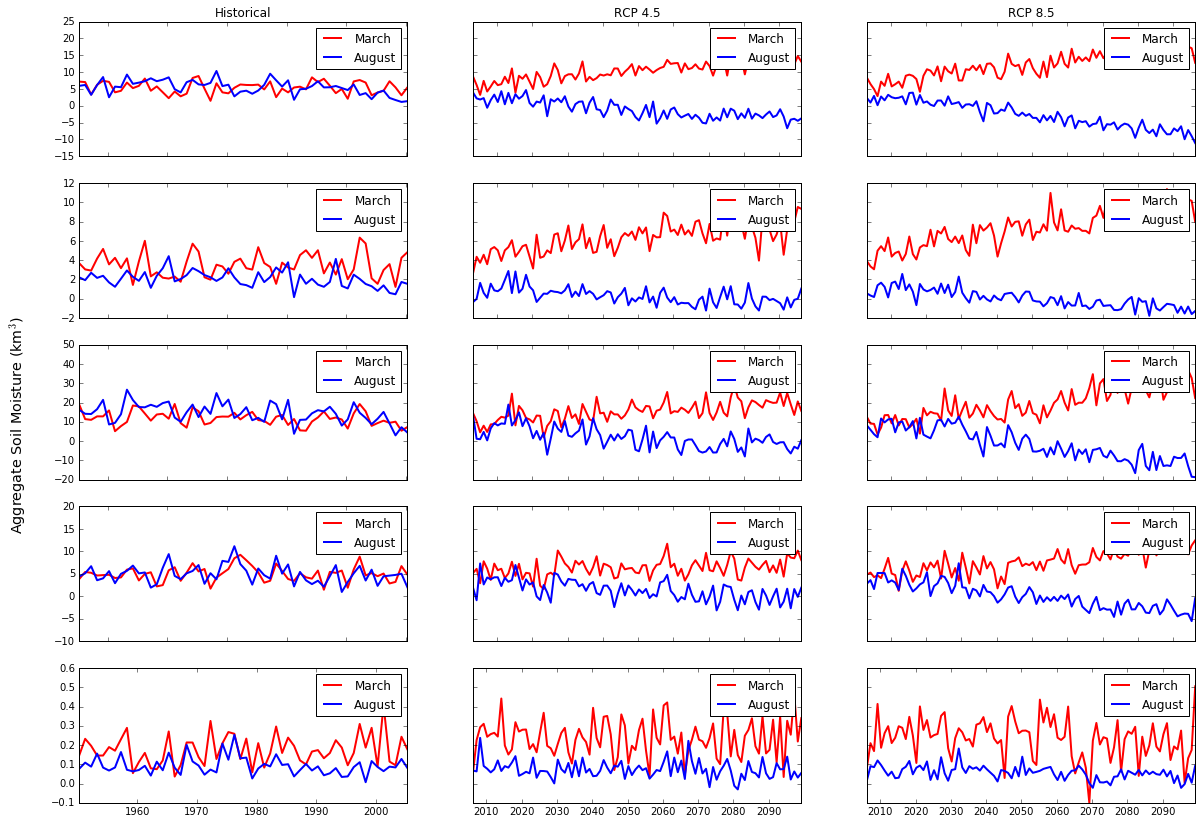

In [2]:
import matplotlib.dates 
lt = 20
rt = 14
lw = 2.0
for variable in variables: 
    num = 0
    fig = plt.figure(figsize=(lt,rt))
    # fig, axes2d = plt.subplots(nrows=5, ncols=3,sharex=True, sharey=True,figsize=(lt,rt))
    for basin in basins: 
        for scenario in scenarios: 
            if (scenario == "historical"):
                base = datetime.datetime(1950, 4, 1)
                end_date = datetime.datetime(2006, 4, 1)
            else:
                base = datetime.datetime(2006, 4, 1)
                end_date = datetime.datetime(2100, 4, 1)
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s.npz' %basin
            data = np.load(os.path.join(direc,file))
            swe = data['swe']
            sm_mar = data['sm_mar']
            sm_aug = data['sm_aug']
            dates = data['dates']
            if (scenario == "historical"):
                ax = fig.add_subplot(5,3,num+1) 
                
            else: 
                ax = fig.add_subplot(5,3,num+1,sharey=ax) 
                plt.setp(ax.get_yticklabels(), visible=False)
        
        
            if (basin != "whites"):
                plt.setp(ax.get_xticklabels(), visible=False)
            else: 
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(10))
                ax.autoscale_view()
                
            if (variable == "swe"):
                ax.plot_date(dates,swe,fmt='-',linewidth=lw)
                # ax.set_ylabel('SWE in km^3')
                ########################### set axes
                if (basin == 'whites'):
                        plt.ylim((0,1))
                elif (basin == "california"):
                        plt.ylim((0,40))
                elif (basin == "cascades"): 
                        plt.ylim((0,80))
                elif (basin == "southernrockies"): 
                        plt.ylim((0,40))
                else:
                        plt.ylim((0,120))
            else: 
                ax.plot_date(dates,sm_mar,'r-',label='March',linewidth=lw)
                ax.plot_date(dates,sm_aug,'b-',label='August',linewidth=lw)
                plt.legend()
            if num == 0:
                ax.set_title('Historical')
            elif num == 1: 
                ax.set_title('RCP 4.5')
            elif num == 2:
                ax.set_title('RCP 8.5')
            num += 1
    if (variable == "swe"):
        fig.text(0.075, 0.5, 'Aggregate SWE (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')
    else: 
        fig.text(0.075, 0.5, 'Aggregate Soil Moisture (km$^{3}$)', va='center', rotation='vertical',size = 'x-large')


    ## save plot
    if (variable == "swe"): 
        direc = '/raid9/gergel/agg_snowpack/plots/agg_swe'
        plotname = 'swe.png' 
        savepath = os.path.join(direc, plotname)
        print ("saving figure to '%s'" % savepath)
        plt.savefig(savepath)
    else: 
        direc = '/raid9/gergel/agg_snowpack/plots/agg_sm'
        plotname = 'sm.png' 
        savepath = os.path.join(direc, plotname)
        print ("saving figure to '%s'" % savepath)
        plt.savefig(savepath)

In [3]:
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
model = "CCSM4"
scenario = "historical"
basin = 'northernrockies'
direc = '/raid9/gergel/agg_snowpack/%s' %scenario
len(models)
swelist = list()
for model in models: 
    filename = '%s_%s.npz' %(model,basin)
    data = np.load(os.path.join(direc,filename))
    swe = data['swe']
    swelist.append(swe)
swelist = np.asarray(swelist)[:,:,0]
swelist.shape
(np.max(swelist,axis=0)).shape

(56,)

Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
Will there be snow to ski on in 50 years?
saving figure to '/raid9/gergel/agg_snowpack/plots/agg_swe/swe_gcms.png'


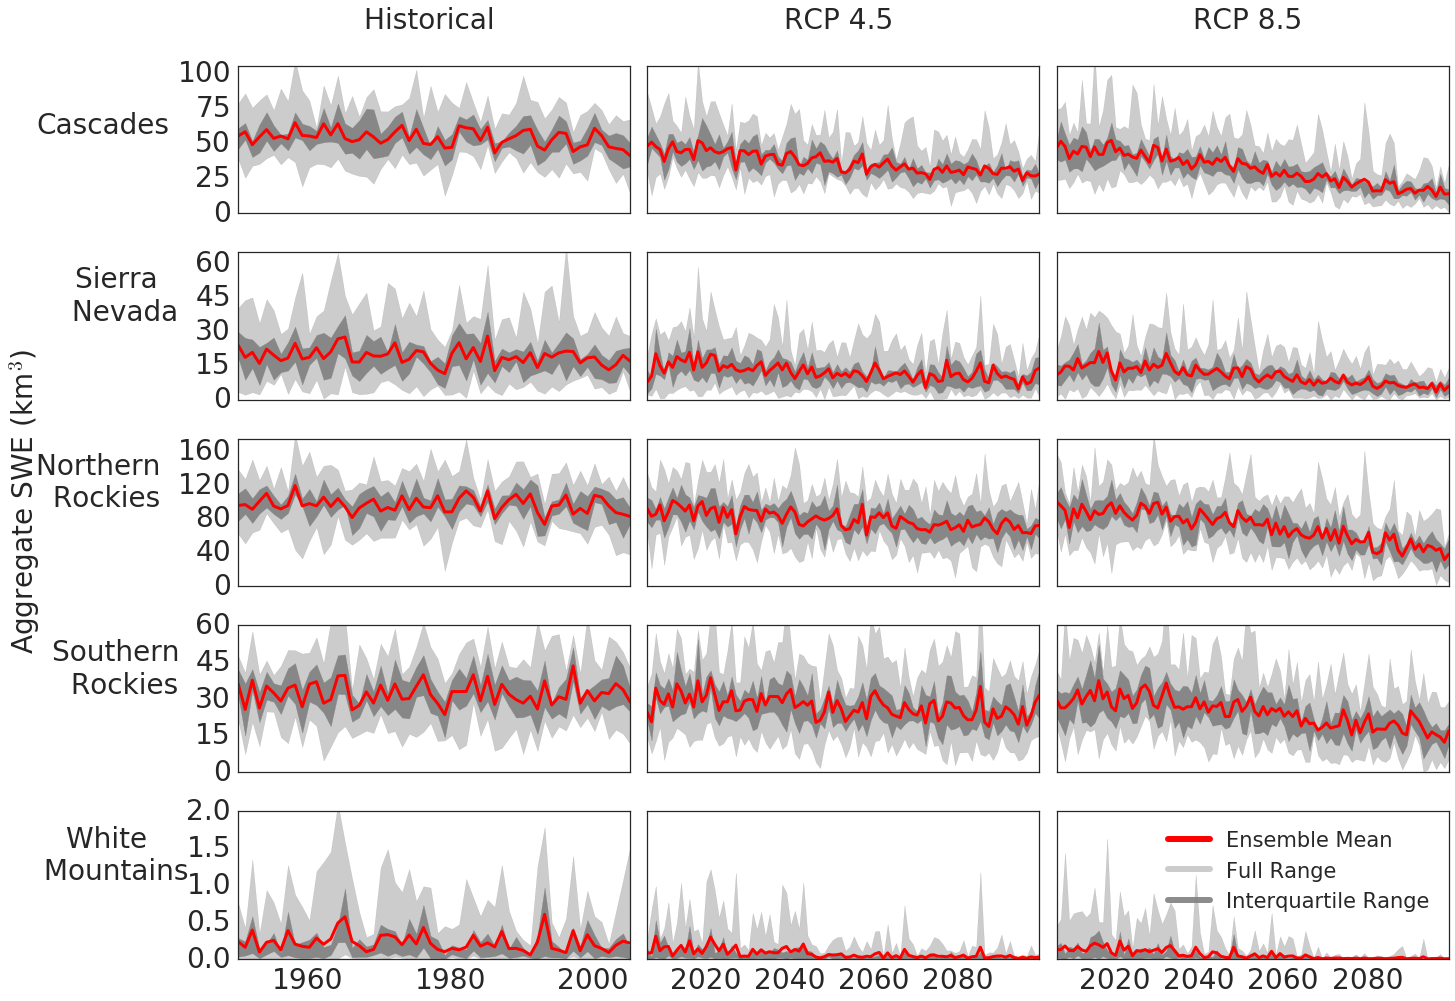

In [4]:
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
import matplotlib.dates 
'''lt = 20
rt = 14'''
lt = 20
rt = 14
lw = 3.0
dpi = 500
lp = 75
variable = "swe"
num = 0
fig = plt.figure(figsize=(lt,rt))

import seaborn as sns

sns.set_style('white')

############# set fontsize ##############
fs = 28 ## fontsize
ls = 15 ## legend size 
lwidth = 6.0 ## linewidth for legend 
#########################################

for basin in basins: 
    for scenario in scenarios: 
        if (scenario == "historical"):
            base = datetime.datetime(1950, 4, 1)
            end_date = datetime.datetime(2006, 4, 1)
        else:
            base = datetime.datetime(2006, 4, 1)
            end_date = datetime.datetime(2100, 4, 1)
        
        ## load ensemble mean data
        direc = '/raid9/gergel/agg_snowpack/%s' %scenario
        file = '%s.npz' %basin
        data = np.load(os.path.join(direc,file))
        swe = data['swe']
        dates = data['dates']
        
        ## load data from each gcm and append to list 
        direc = '/raid9/gergel/agg_snowpack/%s' %scenario
        swelist = list()
        for model in models: 
            filename = '%s_%s.npz' %(model,basin)
            data = np.load(os.path.join(direc,filename))
            swe = data['swe']
            swelist.append(swe)
        swelist = np.asarray(swelist)[:,:,0]
        swemax = np.max(swelist,axis=0)
        swemin = np.min(swelist,axis=0)
        
        if (scenario == "historical"):
            ax = fig.add_subplot(5,3,num+1) 
            ax.yaxis.set_tick_params(labelsize=fs)
                
        else: 
            ax = fig.add_subplot(5,3,num+1,sharey=ax) 
            plt.setp(ax.get_yticklabels(), visible=False)
        
        if num == 0:
            ax.set_title('Historical \n',fontsize=fs)
        elif num == 1: 
            ax.set_title('RCP 4.5 \n',fontsize=fs)
        elif num == 2:
            ax.set_title('RCP 8.5 \n',fontsize=fs)
        else: 
            print('Will there be snow to ski on in 50 years?')
        
        if (basin != "whites"):
            plt.setp(ax.get_xticklabels(), visible=False)
        else: 
            if (scenario == "historical"):
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(20))
            else:
                ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(20))
            ax.xaxis.set_tick_params(labelsize=fs)
            ax.autoscale_view()
                
        # ax.plot_date(dates,swelist.mean(0),fmt='-',color='r',linewidth=lw,label='Ensemble Mean')
        ax.plot_date(dates,swelist.mean(0),fmt='-',color='r',linewidth=lw)
        ax.fill_between(dates,swemin,swemax,color='grey',alpha=0.4,label='Full Range')
        ax.fill_between(dates,np.percentile(swelist,25,0),np.percentile(swelist,75,0),color='grey',alpha=0.9,label='IQR')
        # ax.set_ylabel('SWE in km^3')
        ########################### set axes
        if (basin == 'whites'):
                plt.ylim((0,2))
                plt.yticks(np.arange(0, 2.5, 0.5))
                if (scenario == "historical"):
                    plt.ylabel('White \n Mountains', rotation='horizontal', size=fs, labelpad=lp)
        elif (basin == "california"):
                plt.ylim((0,65))
                plt.yticks(np.arange(0, 75, 15))
                if (scenario == "historical"):
                    plt.ylabel('Sierra \n Nevada', rotation='horizontal', size=fs, labelpad=lp)
        elif (basin == "cascades"): 
                plt.ylim((0,105))
                plt.yticks(np.arange(0, 125, 25))
                if (scenario == "historical"):
                    plt.ylabel('Cascades', rotation='horizontal', size=fs, labelpad=lp)
        elif (basin == "southernrockies"): 
                plt.ylim((0,60))
                plt.yticks(np.arange(0, 75, 15))
                if (scenario == "historical"):
                    plt.ylabel('Southern \n Rockies', rotation='horizontal', size=fs, labelpad=lp)
        else:
                plt.ylim((0,175))
                plt.yticks(np.arange(0, 200, 40))
                if (scenario == "historical"):
                    plt.ylabel('Northern \n Rockies', rotation='horizontal', size=fs, labelpad=lp)
           
        num += 1
        
        ## legend patches
        l1 = mlines.Line2D([], [], color='r', label='Ensemble Mean',linewidth=lwidth)
        l2 = mlines.Line2D([], [], color='grey',alpha=0.4,label='Full Range',linewidth=lwidth)
        l3 = mlines.Line2D([], [], color='grey', alpha=0.9,label='Interquartile Range',linewidth=lwidth)
        # plt.legend(handles=[l1,l2,l3],bbox_to_anchor=(1.1, 1.05),prop={'size':18})
        
        if (basin == "whites" and (scenario == "rcp85")):
            # plt.legend()
            plt.legend(handles=[l1,l2,l3], loc='upper right', prop={'size':21})
            '''plt.legend(handles=[l1,l2,l3], frameon=True, 
                       bbox_to_anchor=(0.5, 1.05), shadow=True, prop={'size':fs})'''

fig.text(-0.01, 0.5, 'Aggregate SWE (km$^{3}$)', va='center', rotation='vertical', size=fs)

plt.tight_layout()

## save plot   
direc = '/raid9/gergel/agg_snowpack/plots/agg_swe'
#plotname = 'swe_gcms.png' 
plotname = 'swe_gcms.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, dpi=dpi, bbox_inches='tight')

SWE HEATMAP WITH STATISTICAL SIGNIFICANCE

In [5]:
def make_df_for_heatmap(modelss,basinss,scenario,fcn,timebeg,timeend):
    import pandas as pd
    from scipy import stats
    diff_means = list()
    pvals = list()
    for model in models: 
        for basin in basins: 
            direc = '/raid9/gergel/agg_snowpack/%s' % "historical"
            file = '%s_%s.npz' %(model,basin)
            data = np.load(os.path.join(direc,file))
            sm_hist = data['swe']
            if fcn == "average":
                sm_hist_mean = np.mean(sm_hist)
            
            direc = '/raid9/gergel/agg_snowpack/%s' %scenario
            file = '%s_%s.npz' %(model,basin)
            data = np.load(os.path.join(direc,file))
            sm = data['swe']
            if fcn == "average":
                sm_mean = np.mean(sm[timebeg:timeend]) 
            
            pvals.append(stats.ttest_ind(sm_hist,sm,equal_var=False)[1])
            diff_means.append(sm_mean - sm_hist_mean)

    diff_means = np.around(np.asarray(diff_means),4)
    pvals = np.asarray(pvals).squeeze()

    d = {'GCMs': modelss, 'Mountain Ranges': basinss, 'means': diff_means}
    d_pvals = {'GCMs': modelss, 'Mountain Ranges': basinss, 'means': pvals}
    df = pd.DataFrame(data=d,index=np.arange(50))
    df_pvals = pd.DataFrame(data=d_pvals,index=np.arange(50))
    df_pivot = df.pivot("Mountain Ranges", "GCMs", "means")
    df_pivot_pvals = df_pvals.pivot("Mountain Ranges", "GCMs", "means")
    
    '''df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains',
                                      'nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)'''
    df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"], axis=0)
    
    df_pivot_pvals = df_pivot_pvals.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"], 
                                                 axis=0)
    
    '''df_pivot_pvals = df_pivot_pvals.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies',
                                                  'whites','plains','nwinterior','coastalnorth','coastalsouth',
                                                  'southwest'], axis=0)'''
    df_pivot_pvals = df_pivot_pvals.iloc[::-1].values.ravel() ## flips over the dataframe, then makes it one dimension 
                                                              ##so that it can be iterated through the same way as ax.text 
    
    return(df_pivot,diff_means,df_pivot_pvals)

def denote_stat_sig(pvals,pivot_table_values,plot_obj):
    count = 0
    for text in plot_obj.texts:
        text.set_size(8)
        if pvals[count] < 0.05: 
            text.set_color('black')
            text.set_weight('bold')
            text.set_style('italic')
        count += 1 
    return(plot_obj)

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/heatmap_swe_gcms_30yr_changeinmeans_stat_sig'


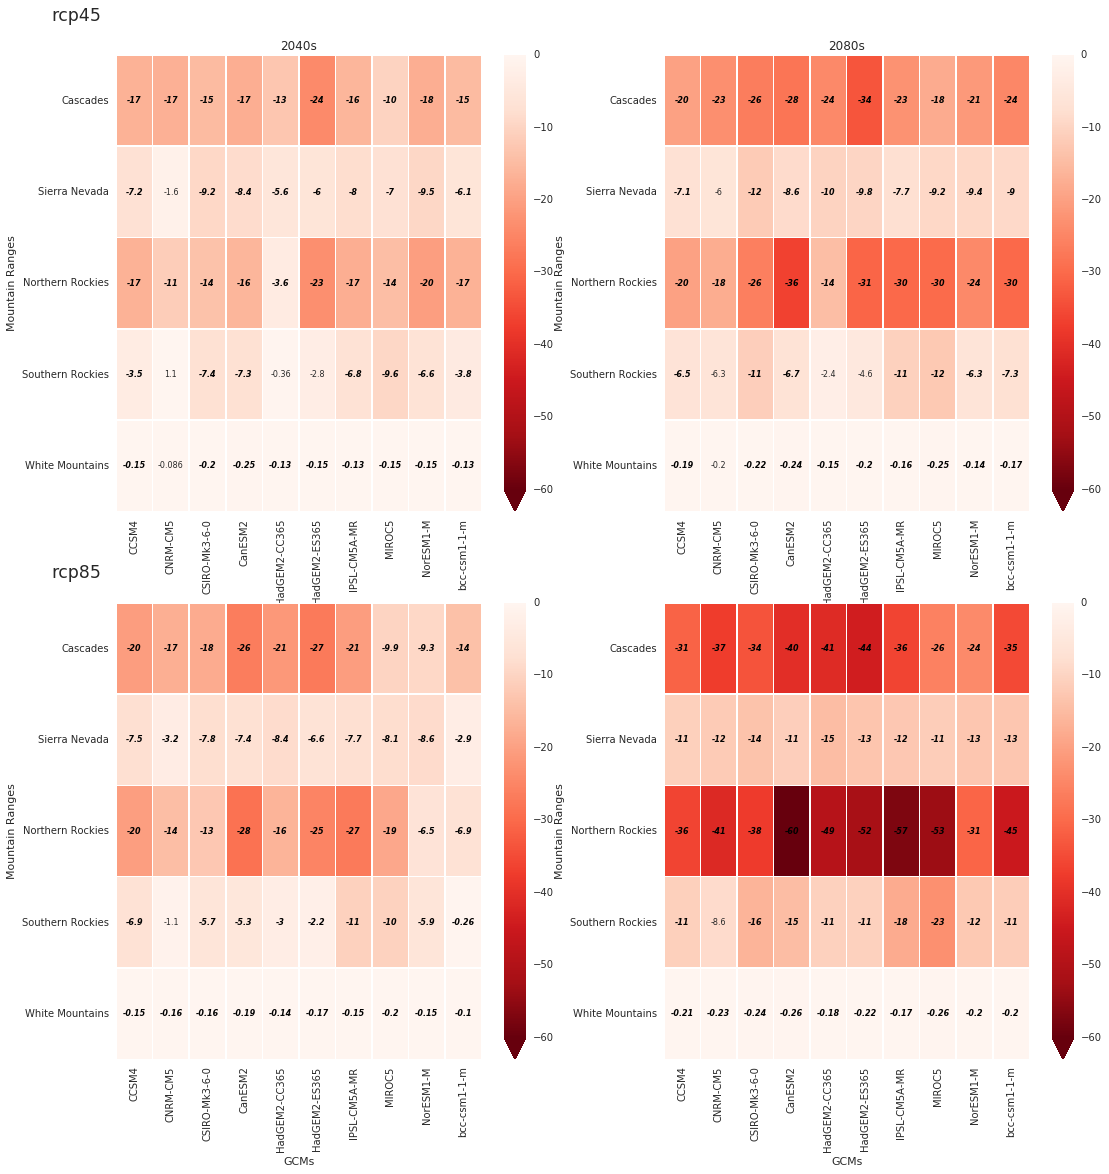

In [6]:
lt = 18
rt = 18
fig = plt.figure(figsize=(lt,rt))

import seaborn as sns
import pandas as pd
basins = ["cascades","california","northernrockies","southernrockies","whites"]
basins_reformatted = ["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"]

models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
basins_10 = np.asarray(basins_reformatted*10)
models_10 = np.asarray(models*5).reshape(5,10).T.ravel()

## 2040s rcp45 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",24,54)
ax = fig.add_subplot(2,2,1)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=-60,vmax=0)
ax.set_title("2040s")
ax = denote_stat_sig(pvals,diff_means,ax)
locs, labels = plt.yticks()
plt.setp(labels, rotation=360)

## 2080s rcp45 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",64,94)
ax = fig.add_subplot(2,2,2)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=-60,vmax=0)
ax.set_title("2080s")
ax = denote_stat_sig(pvals,diff_means,ax)
locs, labels = plt.yticks()
plt.setp(labels, rotation=360)

## 2040s rcp85 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",24,54)
ax = fig.add_subplot(2,2,3)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=-60,vmax=0)
ax = denote_stat_sig(pvals,diff_means,ax)
locs, labels = plt.yticks()
plt.setp(labels, rotation=360)

## 2080s rcp85 
df_pivot,diff_means,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",64,94)
ax = fig.add_subplot(2,2,4)
sns.heatmap(df_pivot, annot=True, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=-60,vmax=0)
ax = denote_stat_sig(pvals,diff_means,ax)
locs, labels = plt.yticks()
plt.setp(labels, rotation=360)

fig.text(0.075, 0.5, 'rcp85', va='center', rotation='horizontal',size = 'x-large')
fig.text(0.075, 0.93, 'rcp45', va='center', rotation='horizontal',size = 'x-large')

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_swe_gcms_30yr_changeinmeans_stat_sig' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

SWE HEATMAP WITH STATISTICAL SIGNIFICANCE: NORMALIZED 

In [7]:
def make_df_for_heatmap(modelss,basinss,scenario,fcn,timechunk):
    import pandas as pd
    from scipy import stats
    diff_means = list()
    pvals = list()
    for model in models: 
        for basin in basins: 
            direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data'
            file = '%s_%s_%s.npz' %(model,basin,"historical")
            data = np.load(os.path.join(direc,file))
            sm_hist = data['swe']
            if fcn == "average":
                sm_hist_mean = np.mean(sm_hist)
            
            direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data'
            file = '%s_%s_%s.npz' %(model,basin,scenario)
            data = np.load(os.path.join(direc,file))
            if (timechunk == "2020s"):
                sm = data['swe_2010_2039']
            elif (timechunk == "2050s"):
                sm = data['swe_2040_2069']
            else:
                sm = data['swe_2070_2099']
            if fcn == "average":
                sm_mean = np.mean(sm) 
            
            pvals.append(stats.ttest_ind(sm_hist,sm,equal_var=False)[1])
            diff_means.append(sm_mean - sm_hist_mean)

    diff_means = np.around(np.asarray(diff_means),4)
    pvals = np.around(np.asarray(pvals).squeeze(),0)

    d = {'GCMs': modelss, 'Mountain Ranges': basinss, 'means': diff_means}
    d_pvals = {'GCMs': modelss, 'Mountain Ranges': basinss, 'means': pvals}
    df = pd.DataFrame(data=d,index=np.arange(50))
    df_pvals = pd.DataFrame(data=d_pvals,index=np.arange(50))
    df_pivot = df.pivot("Mountain Ranges", "GCMs", "means")
    df_pivot_pvals = df_pvals.pivot("Mountain Ranges", "GCMs", "means")
    
    df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"], axis=0)
    
    df_pivot_pvals_f = df_pivot_pvals.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"], 
                                                 axis=0)
    
    df_pivot_pvals = df_pivot_pvals_f.iloc[::-1].values.ravel() ## flips over the dataframe, then makes it one dimension 
                                                              ##so that it can be iterated through the same way as ax.text 
    
    return(df_pivot,diff_means,df_pivot_pvals_f,df_pivot_pvals)

def denote_stat_sig(pvals,pivot_table_values,plot_obj):
    count = 0
    for text in plot_obj.texts:
        text.set_size(9)
        if pvals[count] < 0.05: 
            text.set_color('blue')
            text.set_weight('bold')
            text.set_style('italic')
        count += 1 
    return(plot_obj)

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/heatmap_swe_gcms_30yr_changeinmeans_stat_sig_normalized.tiff'


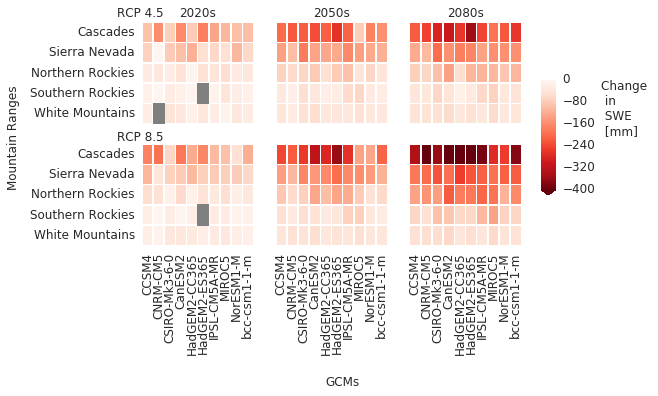

In [8]:
'''lt = 35
rt = 18'''
lt = 6.8
rt = 4
fs = 12
fig = plt.figure(figsize=(lt,rt))

import seaborn as sns
import pandas as pd
basins = ["cascades","california","northernrockies","southernrockies","whites"]
basins_reformatted = ["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"]

models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
basins_10 = np.asarray(basins_reformatted*10)
models_10 = np.asarray(models*5).reshape(5,10).T.ravel()

vm = -400
ann = False
f = ".1f"
dpi = 500

## set axes and label sizes. There is a Github pull request that describes how to do this: 
#############################  https://github.com/mwaskom/seaborn/issues/181
rc={'font.size': 32, 'axes.labelsize': fs,'axes.titlesize': fs, 'xtick.labelsize': fs, 'ytick.labelsize': fs}
sns.set_context(rc=rc)

## add separate axes for colorbar 
cbar_ax = fig.add_axes([.94, .3, .03, .4])
# cbar = plt.colorbar(img, ax=cbar_ax)
cbar_ax.text(4.1, 0.5, 'Change \n in \n SWE \n [mm]',rotation='horizontal', size=fs)


## 2020s rcp45 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average","2020s")
ax = fig.add_subplot(2,3,1)
sns.heatmap(df_pivot, 
            annot=ann, 
            cbar=True,
            cbar_ax=cbar_ax,
            linewidths=.5, 
            cmap='Reds_r',
            cbar_kws={"extend": 'min', "orientation": "vertical"}, 
            vmin=vm, vmax=0)

ax.set_title("2020s",size=fs)
#ax = denote_stat_sig(pvals,diff_means,ax)
maskk = pvals_df < 0.05
'''sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',
            annot=ann,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False, cmap='gray')

locs, labels = plt.yticks()
plt.setp(labels, rotation=360)
plt.setp(ax.get_xticklabels(),visible=False)
ax.get_xaxis().set_visible(False)
ax.set_ylabel('')

## 2050s rcp45 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average","2050s")
ax = fig.add_subplot(2,3,2)
sns.heatmap(df_pivot, 
            annot=ann, 
            cbar=False, 
            linewidths=.5,
            cmap='Reds_r',
            cbar_kws={"extend": 'min'},
            vmin=vm, vmax=0)
ax.set_title("2050s",size=fs)
#ax = denote_stat_sig(pvals,diff_means,ax)
maskk = pvals_df < 0.05
'''sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',
            annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''

sns.heatmap(df_pivot, annot=False, mask=pvals_df < 0.05, cbar=False, cmap='gray')

locs, labels = plt.yticks()
plt.setp(ax.get_yticklabels(),visible=False)
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

## 2080s rcp45 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average","2080s")
ax = fig.add_subplot(2,3,3)
sns.heatmap(df_pivot, annot=ann, cbar=False, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=vm,vmax=0)
ax.set_title("2080s",size=fs)
#ax = denote_stat_sig(pvals,diff_means,ax)
maskk = pvals_df < 0.05
'''sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',
            annot=True,cbar_ax=cbar_ax, annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''

sns.heatmap(df_pivot, annot=False, mask=pvals_df < 0.05, cbar=False, cmap='gray')

locs, labels = plt.yticks()
plt.setp(ax.get_yticklabels(),visible=False)
plt.setp(ax.get_xticklabels(),visible=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

## 2020s rcp85 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average","2020s")
ax = fig.add_subplot(2,3,4)
sns.heatmap(df_pivot, annot=ann, cbar=False, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=vm,vmax=0)
#ax = denote_stat_sig(pvals,diff_means,ax)
maskk = pvals_df < 0.05
'''sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',
            annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''

sns.heatmap(df_pivot, annot=False, mask=pvals_df < 0.05, cbar=False, cmap='gray')

locs, labels = plt.yticks()
plt.setp(labels, rotation=360)
ax.set_ylabel('')
ax.set_xlabel('')

## 2050s rcp85 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average","2050s")
ax = fig.add_subplot(2,3,5)
sns.heatmap(df_pivot, annot=ann, cbar=False, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=vm,vmax=0)
#ax = denote_stat_sig(pvals,diff_means,ax)
maskk = pvals_df < 0.05

'''sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',
            annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''

sns.heatmap(df_pivot, annot=False, mask=pvals_df < 0.05, cbar=False, cmap='gray')

locs, labels = plt.yticks()
plt.setp(ax.get_yticklabels(),visible=False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')

## 2080s rcp85 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average","2080s")
ax = fig.add_subplot(2,3,6)
img = sns.heatmap(df_pivot, annot=ann, cbar=False, linewidths=.5,cmap='Reds_r',cbar_kws={"extend": 'min'},vmin=vm,vmax=0)
#ax = denote_stat_sig(pvals,diff_means,ax)
maskk = pvals_df < 0.05
'''sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',
            annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''

sns.heatmap(df_pivot, annot=False, mask=pvals_df < 0.05, cbar=False, cmap='gray')

locs, labels = plt.yticks()
plt.setp(ax.get_yticklabels(),visible=False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')

# fig.tight_layout(rect=[0, 0, .9, 1])
# fig.tight_layout()

fig.text(0.075, 0.5, 'RCP 8.5', va='center', rotation='horizontal',size = fs)
fig.text(0.075, 0.93, 'RCP 4.5', va='center', rotation='horizontal',size = fs)
fig.text(-0.15, 0.5, 'Mountain Ranges', va='center', rotation='vertical',size = fs)
fig.text(0.5, -0.35, 'GCMs', va='center', rotation='horizontal', size=fs)

'''fig.text(0.075, 0.5, 'RCP 8.5', va='center', rotation='horizontal',size = fs)
fig.text(0.075, 0.93, 'RCP 4.5', va='center', rotation='horizontal',size = fs)'''

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_swe_gcms_30yr_changeinmeans_stat_sig_normalized.tiff' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, format='tiff', bbox_inches='tight', dpi=dpi)

In [9]:
'''lt = 35
rt = 18
# fig = plt.figure(figsize=(lt,rt))

import seaborn as sns
import pandas as pd
basins = ["cascades","california","northernrockies","southernrockies","whites"]
basins_reformatted = ["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains"]

models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
basins_10 = np.asarray(basins_reformatted*10)
models_10 = np.asarray(models*5).reshape(5,10).T.ravel()

vm = -400
ann = False
f = ".1f"
fs = 25

## set axes and label sizes. There is a Github pull request that describes how to do this: 
#############################  https://github.com/mwaskom/seaborn/issues/181
rc={'font.size': fs, 'axes.labelsize': fs,'axes.titlesize': fs, 'xtick.labelsize': fs, 'ytick.labelsize': fs}
sns.set_context(rc=rc)

fig, axn = plt.subplots(2, 3, sharex=True, sharey=True,figsize=(lt,rt))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

scens = ["rcp45","rcp45","rcp45","rcp85","rcp85","rcp85"]
climate_periods = ["2020s","2050s","2080s","2020s","2050s","2080s"]

figcount = 0
for i, ax in enumerate(axn.flat):
    df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,scens[figcount],
                                                             "average",climate_periods[figcount])
    sns.heatmap(df_pivot, annot=ann, ax=ax, cbar=i == 0, cbar_ax=None if i else cbar_ax, fmt=f,linewidths=.5,
                cmap='Reds_r',cbar_kws={"extend": 'min'},
                vmin=vm,vmax=0)
    
    maskk = pvals_df < 0.05
    
    '''sns.heatmap(df_pivot, mask=maskk, ax=ax, cbar=False,cmap='gray',
                annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''
    
    sns.heatmap(df_pivot, annot=False, mask=pvals_df < 0.05, cbar=False, cmap='gray')
    locs, labels = plt.yticks()
    if scens[figcount] == "rcp45":
        ax.set_title(climate_periods[figcount],size=fs)
        plt.setp(ax.get_xticklabels(),visible=False)
        ax.get_xaxis().set_visible(False)
    else: 
        plt.setp(labels, rotation=360)
    if climate_periods[figcount] != "2020s":
        plt.setp(ax.get_yticklabels(),visible=False)
        ax.get_yaxis().set_visible(False) 
    else: 
        plt.setp(ax.yaxis.get_label(),visible=False) ## set y-axis labels to invisible 
    if climate_periods[figcount] != "2050s":
        plt.setp(ax.xaxis.get_label(),visible=False) ## set y-axis labels to invisible 
    figcount += 1 

# cbar_ax.set_label('[mm]',rotation='horizontal')
cbar_ax.text(1.8,0.5,'[mm]',rotation='horizontal',size=fs)

fig.text(0.075, 0.5, 'rcp85', va='center', rotation='horizontal',size = fs)
fig.text(0.075, 0.93, 'rcp45', va='center', rotation='horizontal',size = fs)
fig.text(0.0, 0.5, 'Mountain Ranges', va='center', rotation='vertical',size = fs)

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_swe_gcms_30yr_changeinmeans_stat_sig_normalized' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath,dpi=150)'''

SyntaxError: invalid syntax (<ipython-input-9-72f9672d35a8>, line 41)